**`using machine learning to create a model that predicts which passengers survived the Titanic shipwreck.`**

- survival (0 = No, 1 = Yes)
- pclass = Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex (male, female)
- age
- sibsp = No. of siblings / spouses aboard the Titanic
- parch = No. of parents / children aboard the Titanic
- ticket = Ticket number
- fare
- cabin = Cabin number
- embarked = Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing Dataset

In [2]:
train_set = pd.read_csv('train.csv')

In [3]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Explore Dataset**

In [4]:
train_set.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [5]:
survived = train_set[train_set['Survived']==1]
not_survived = train_set[train_set['Survived']==0]

In [6]:
print('Total Passengers: ', len(train_set))
print('No. of Passengers who survived: ', len(survived))
print('No. of Passengers who did not survived: ', len(not_survived))

Total Passengers:  891
No. of Passengers who survived:  342
No. of Passengers who did not survived:  549


In [7]:
print('% Survived: ', 1.0 * len(survived)/len(train_set) *100)
print('% Not Survived: ', 1.0 * len(not_survived)/len(train_set) *100)

% Survived:  38.38383838383838
% Not Survived:  61.61616161616161


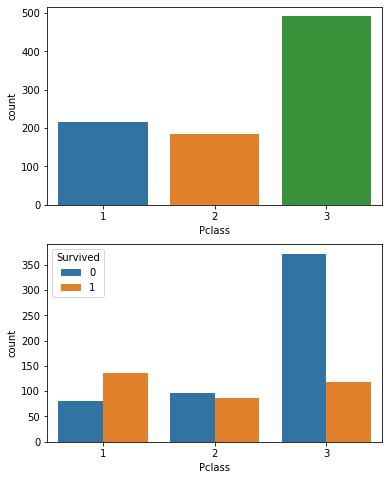

In [8]:
plt.figure(figsize=[6,8])
plt.subplot(211)
sns.countplot(x='Pclass', data=train_set)
plt.subplot(212)
sns.countplot(x='Pclass', hue='Survived', data=train_set)

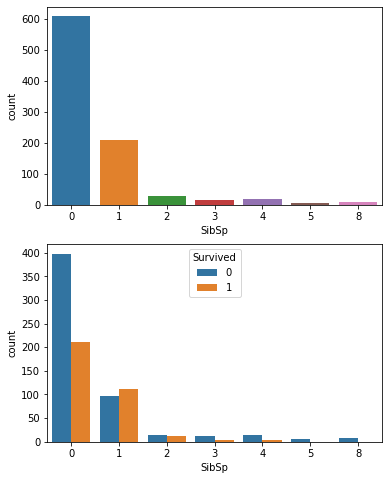

In [9]:
plt.figure(figsize=[6,8])
plt.subplot(211)
sns.countplot(x='SibSp', data=train_set)
plt.subplot(212)
sns.countplot(x='SibSp', hue='Survived', data=train_set)

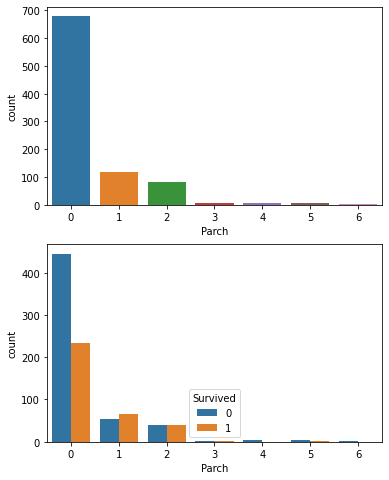

In [10]:
plt.figure(figsize=[6,8])
plt.subplot(211)
sns.countplot(x='Parch', data=train_set)
plt.subplot(212)
sns.countplot(x='Parch', hue='Survived', data=train_set)

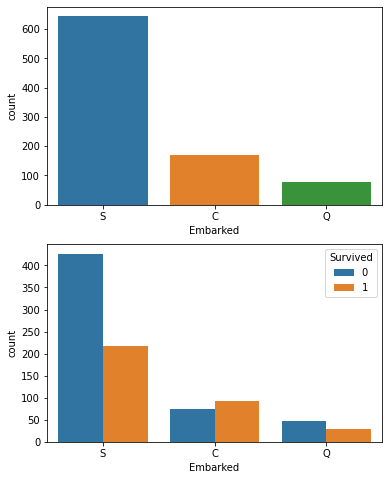

In [11]:
plt.figure(figsize=[6,8])
plt.subplot(211)
sns.countplot(x='Embarked', data=train_set)
plt.subplot(212)
sns.countplot(x='Embarked', hue='Survived', data=train_set)

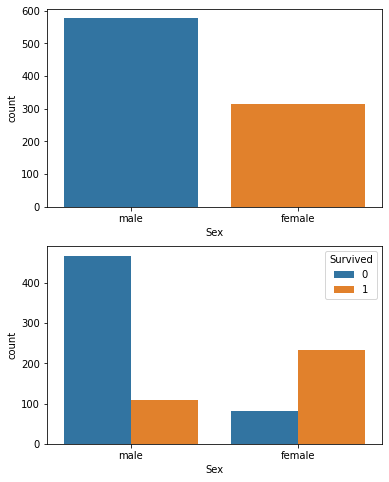

In [12]:
plt.figure(figsize=[6,8])
plt.subplot(211)
sns.countplot(x='Sex', data=train_set)
plt.subplot(212)
sns.countplot(x='Sex', hue='Survived', data=train_set)

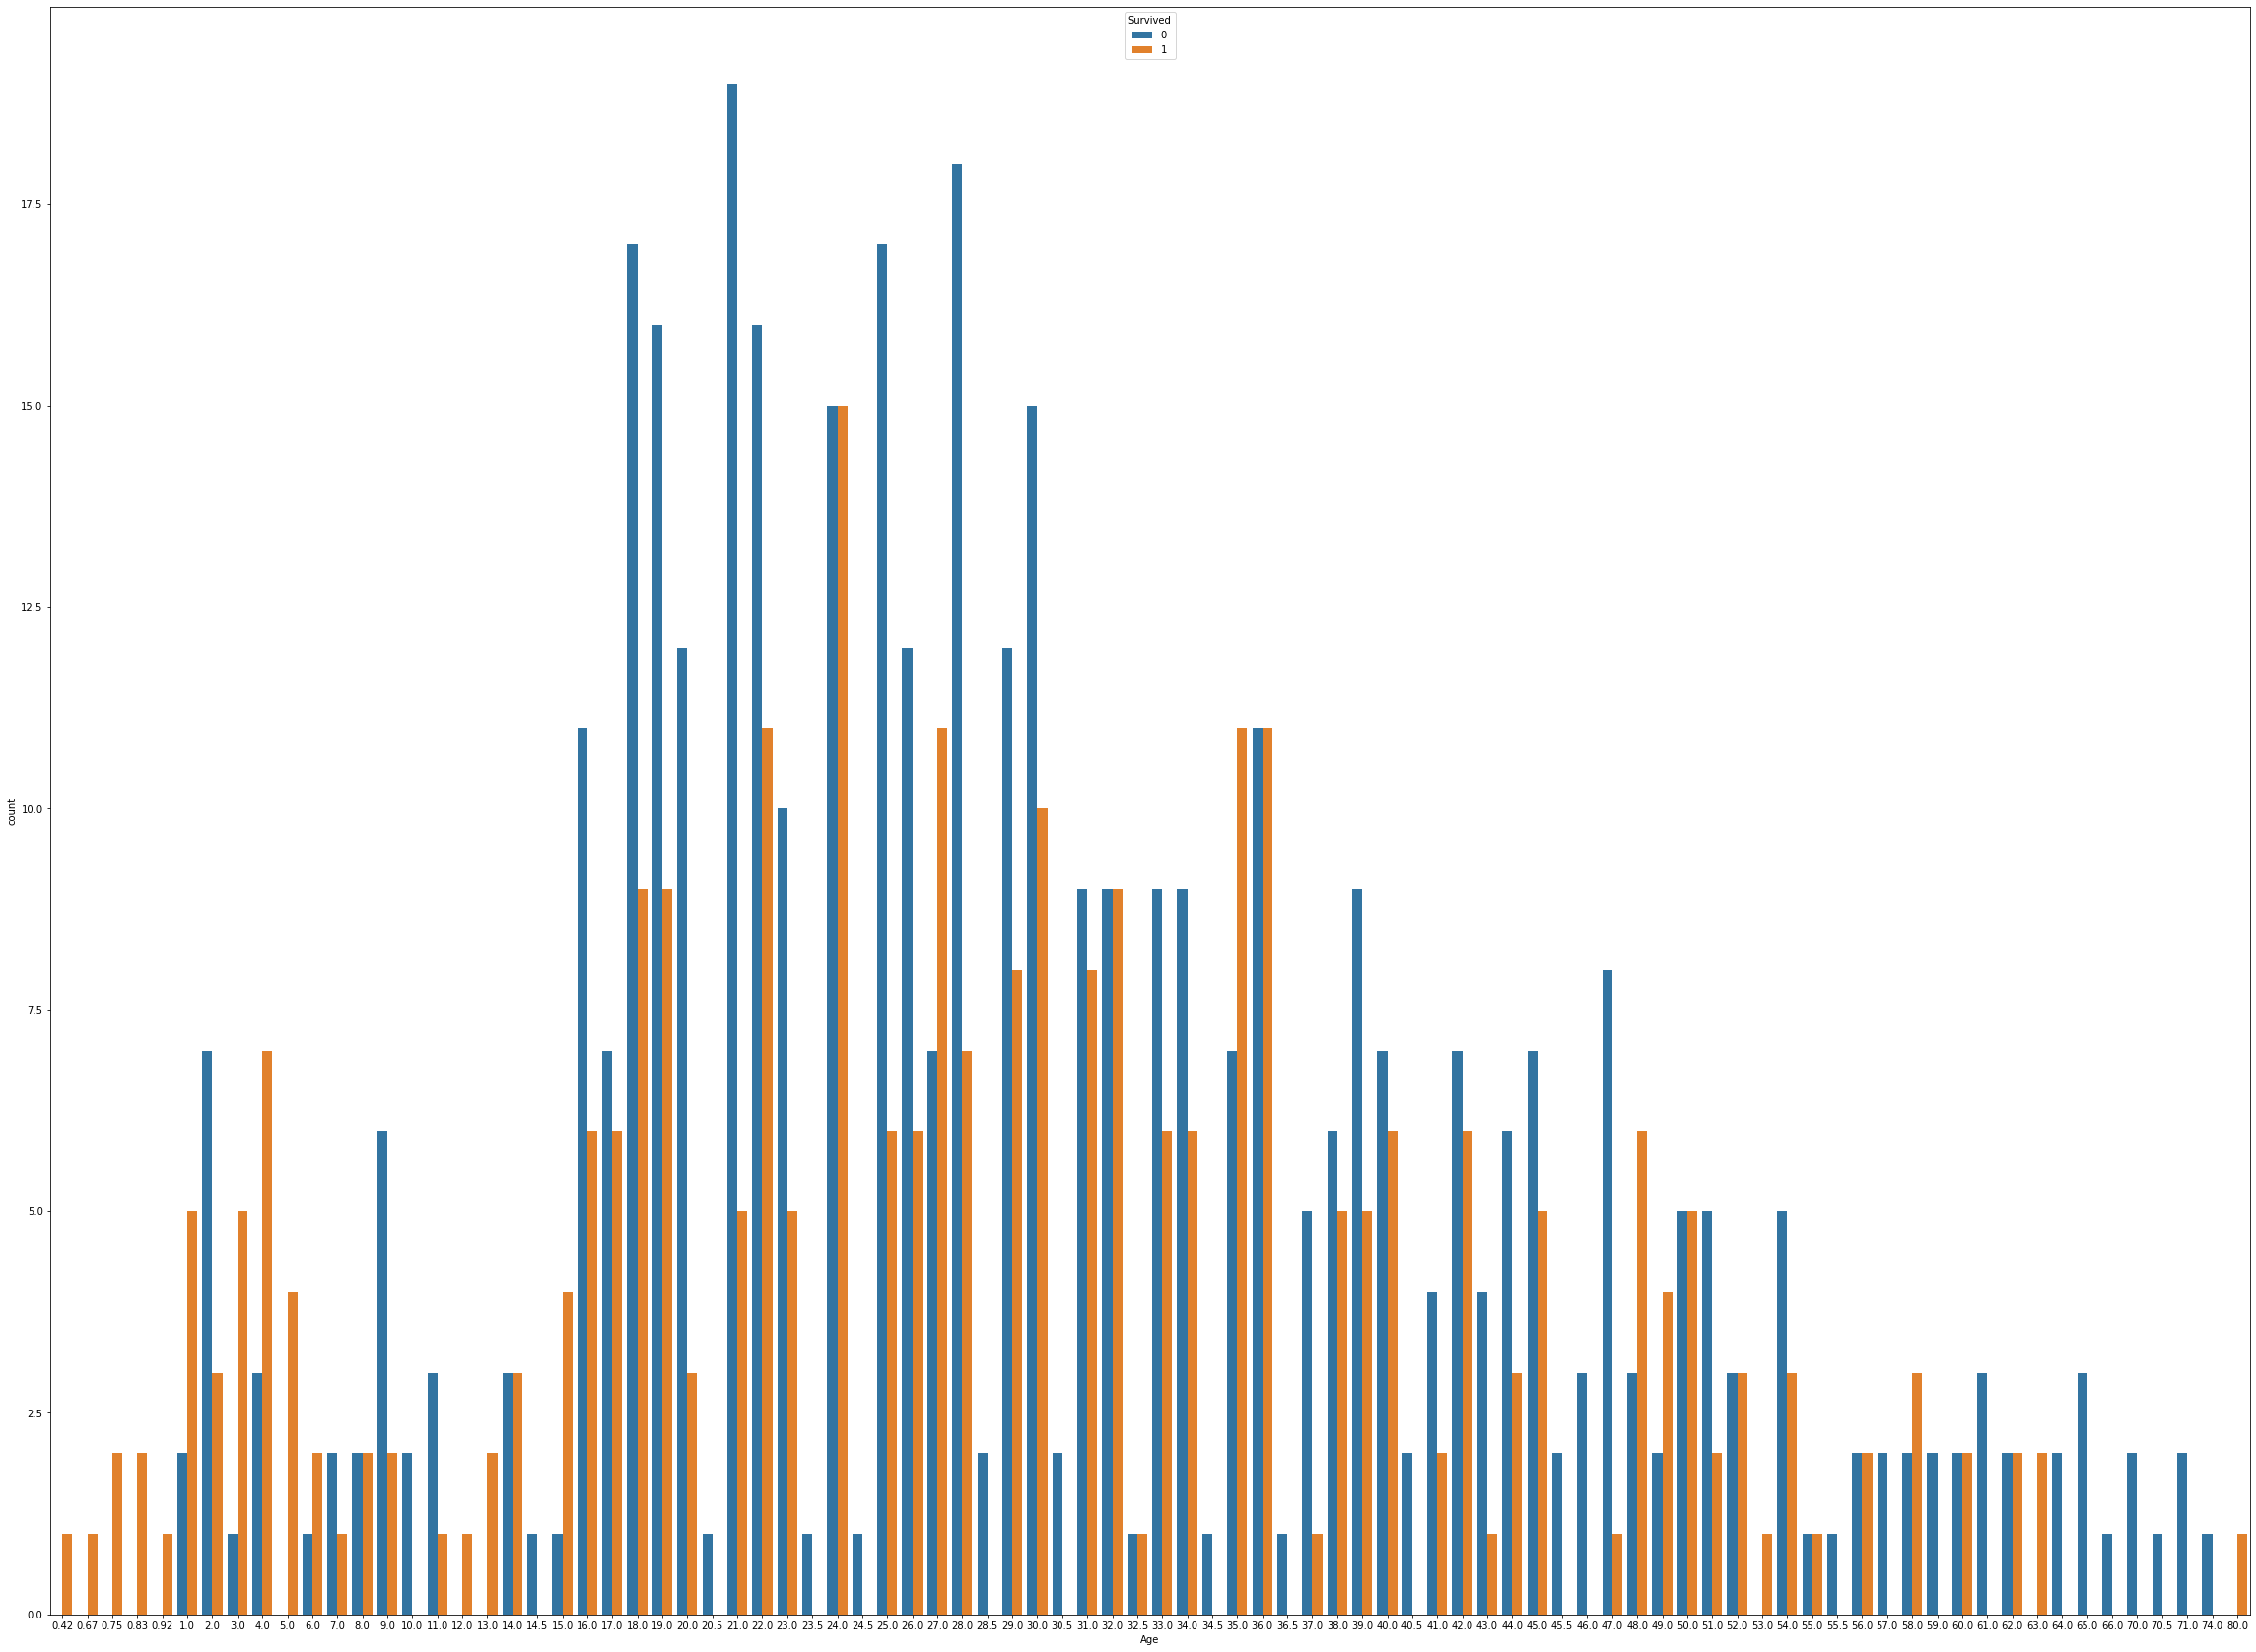

In [13]:
plt.figure(figsize=[40,30])
sns.countplot(x='Age', hue='Survived', data=train_set)

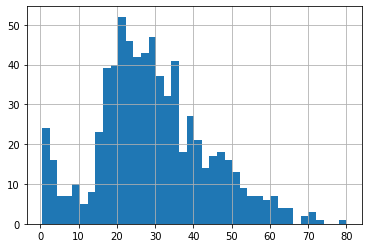

In [14]:
train_set['Age'].hist(bins=40)

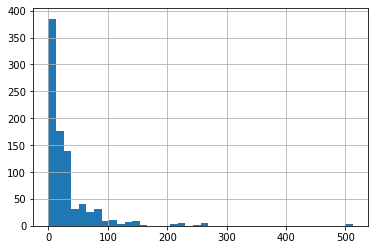

In [15]:
train_set['Fare'].hist(bins=40)

**Data Cleaning**

In [18]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
train_set.drop('Cabin', axis=1, inplace=True)

In [20]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
train_set.drop(['Name','Ticket','Embarked'], axis=1, inplace=True)

In [22]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [23]:
def fill_null(data):
  age = data[0]
  sex = data[1]

  if pd.isnull(data[0]):
    if sex is 'male':
      return 29
    else:
      return 25
  else:
    return age

In [24]:
train_set['Age'] = train_set[['Age','Sex']].apply(fill_null, axis=1)

In [25]:
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

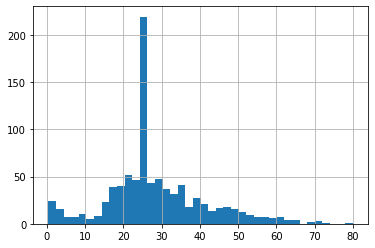

In [26]:
train_set['Age'].hist(bins=40)

In [27]:
train_set.drop('PassengerId', axis=1, inplace=True)

In [28]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [31]:
male = pd.get_dummies(train_set['Sex'], drop_first=True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [32]:
train_set = pd.concat([train_set, male], axis=1)

In [34]:
train_set.drop('Sex', axis=1, inplace=True)

In [35]:
train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


**Separating Independent and Dependent Variable**

In [38]:
x = train_set.drop('Survived', axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,0
888,3,25.0,1,2,23.4500,0
889,1,26.0,0,0,30.0000,1


In [39]:
y = train_set['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Training Model

In [40]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [41]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction

In [42]:
y_pred = logr.predict(x_test)

**Evaluation**

Accurcay :  80.44692737430168


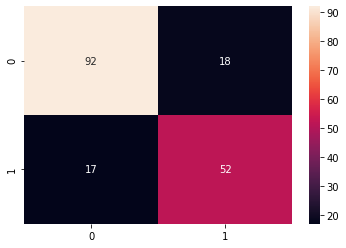

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accurcay : ', accuracy_score(y_test, y_pred)*100 )
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

